# **Diabetes Risk Assessment using Socio-Economic Factors**

# Team
* Tony DiRubbo - adirubbo13  
* Rohan Gopalan - ro7an69  
* Siddhant Kasture - sid12super  
* Sanchitha Sudarshana - Sanchita-10  
* Katia Leach - kleach01 

# Introduction

There are several types of diabetes, but type II diabetes is the most widespread, disproportionately affecting populations based on socioeconomic conditions rather than purely biological or health-related factors. The high costs associated with diabetes ranging from daily management tools like insulin and glucose monitors to long-term complications such as hospitalization and disability place pressure on both individuals and broader systems like public healthcare and private insurance. Insurance providers, particularly those serving low-income populations, face the dual challenge of managing increasing care costs while attempting to provide equitable coverage. As a result, marginalized communities often bear a greater burden of this disease, leading to an inequitable distribution of long-term health consequences and financial strain. This creates a clear and significant need for tools that can proactively identify at-risk individuals based on socioeconomic vulnerabilities, rather than waiting for physical symptoms or comorbidities to appear.

Our project seeks to address this need by developing a machine learning model that predicts a person’s likelihood of developing type II diabetes using a range of socioeconomic and demographic variables. These include income level, education attainment, employment status, access to healthcare, food security, and neighborhood characteristics, marital status, substance use, as well as age and gender. By focusing on these determinants, our model aims to help insurance providers and public health organizations better allocate resources, design targeted interventions, and implement preventative care strategies before diabetes manifests. Although our solution does not treat diabetes or directly intervene in care delivery, it represents an incremental yet important step toward addressing structural inequalities in disease prevention. In doing so, we hope to support stakeholders in reducing both the human and economic toll of diabetes through data-informed, equity-centered decision-making.


# Literature Review

To understand current trends in diabetes prediction using machine learning, it is crucial to examine the existing literature. Key areas to focus on include data preparation methods, model selection, and evaluation metrics. Additionally, identifying key stakeholders in this field is essential for understanding the broader impact of machine learning in diabetes research.

In their paper Predicting Diabetes Mellitus with Machine Learning Techniques, Quan Zou, Kaiyang Qu, Yamei Luo, Dehui Yin, Ying Ju, and Hua Tang from the School of Computer Science and Technology at Tianjin University use Chinese hospital data to predict diabetes diagnoses. For data preparation, they employed Principal Component Analysis (PCA) to reduce dimensionality by creating new components derived from the original variables. PCA calculates eigenvalues from a feature matrix, helping streamline the analysis. PCA could potentially be a strong indicator of what socioeconomic factors play a large role in the components and thus how diabetes is predicted in the models developed. Meanwhile, authors Dagliati et al. (2018), in the Journal of Diabetes Science and Technology, highlighted the importance of scaling data and applied z-score scaling to standardize all numeric variables in their study.

Both papers utilized a similar set of categorical classification models, including decision trees, random forests, and neural networks. However, Aishwarya Mujumdar and Dr. Vaidehi from the Vellore Institute of Technology, Chennai, India, chose to use a K-Nearest Neighbors (K-NN) model in their study Diabetes Prediction Using Machine Learning Algorithms.

All three studies evaluated their models using accuracy as the primary metric. However, it is important to note that accuracy may not always be the best indicator of model performance. Precision and recall, which can be combined to generate an F1 score, may provide a more balanced assessment. The F1 score is the harmonic mean of precision (the proportion of true positives out of predicted positives) and recall (the proportion of true positives out of actual positives). The highest accuracies recorded in these studies were 0.8084, 0.7721, and 0.72, respectively. Note that these studies used health-related metrics to build their models, our models will be unique as socioeconomic factors will be implemented over health-related features to be more aligned with the benefits of the stakeholders.

It is also worth noting that all three studies relied on international datasets, which may not be as standardized as domestic data used in other analyses. This variability could affect the generalizability of the results.

Overall, this brief overview of current research trends in diabetes prediction highlights the importance of proper feature engineering and data preparation. Most studies use classification models and evaluate them based on accuracy, with typical accuracies around 0.75. However, more nuanced metrics like precision, recall, and F1-score can provide a clearer picture of model performance.

Key stakeholders in this research include governmental organizations, which could use these models to inform public health policy and direct funding toward communities most at risk for type II diabetes due to socioeconomic disparities. Affected populations would benefit from earlier identification and intervention, potentially reducing long-term health and financial burdens. The broader health system stands to gain from more efficient resource allocation and reduced strain on services by shifting focus toward prevention rather than reactive treatment.


# Data and Methods

## Data
This project is based on the 2023 Behavioral Risk Factor Surveillance System (BRFSS) dataset, a nationally representative health survey conducted by the Centers for Disease Control and Prevention (CDC).

The data can be found at: https://www.cdc.gov/brfss/annual_data/annual_2023.html. For ease of access drive link has also be included: https://drive.google.com/file/d/1sTHUMLO0PUs0yp7hUl_j2qghDeb3MrId/view?usp=sharing.
The BRFSS collects data annually from over 400,000 individuals across the United States, capturing a wide range of self-reported information related to demographics, chronic health conditions, lifestyle behaviors, and access to healthcare. We obtained the dataset in .XPT (SAS transport) format directly from the CDC's official repository, ensuring both data authenticity and public accessibility.
The full dataset comprises more than 350 variables and hundreds of thousands of observations. Given the scale and scope of the raw data, we filtered it to focus specifically on variables relevant to our central objective: identifying behavioral and socioeconomic predictors of diabetes risk. Using a combination of domain knowledge, literature references, and exploratory data analysis, we extracted a subset of 28 variables. These include features spanning household and living conditions, healthcare access, physical and mental health indicators, financial and employment factors, social environment, and education and lifestyle awareness. We also constructed a binary target variable, DiabetesTARGET, which reflects whether a respondent reported having been diagnosed with diabetes (including gestational diabetes).
Our exploratory analysis revealed a class imbalance in the target variable, with significantly more respondents reporting no diagnosis of diabetes compared to those who had been diagnosed. This imbalance informed our modeling approach and was addressed through appropriate evaluation metrics and techniques.
Prior to analysis, we performed extensive data cleaning and preprocessing to ensure consistency and readiness for modeling. Categorical survey responses encoded as numeric codes—such as “Don’t know,” “Refused,” or skipped questions—were systematically mapped to nulls or appropriate fallback values. Missing values were imputed using the median for continuous variables and the mode for binary or categorical features. We also applied manual label encoding and value recoding to standardize the data into interpretable and model-friendly formats. All transformations, feature engineering steps, and imputation logic are fully documented in the accompanying preprocessing and wrangling notebooks.

## Methods

### Data Collection and Preparation
The 2023 BRFSS dataset, provided in SAS (.xpt) format, was imported into a pandas DataFrame using Python’s pandas library. Socio-economic variables were selected based on their hypothesized inﬂuence on diabetes risk, including residence type, education level, employment status, income, and access to healthcare. Direct health indicators (e.g., blood glucose) were excluded due to survey limitations, focusing the analysis on non-clinical predictors.

### Data Cleaning and Encoding
Data cleaning involved handling missing values and encoding variables for machine learning compatibility. Missing values were imputed using the median for continuous variables and the mode for categorical and binary variables, preserving data integrity. Unlike automated encoding methods (e.g., one-hot encoding or label encoding), categorical survey responses were manually encoded to numerical values to preserve the ordinal or semantic meaning inherent in the BRFSS questionnaire. For example, education levels (e.g., “never attended school” to “college graduate”) were mapped to an ordinal scale (0 to 4), reﬂecting increasing educational attainment. Binary responses (e.g., “yes/no”) were assigned 1 and 0, respectively. Manual encoding ensured that the encoded values aligned with the survey’s context, avoiding misinterpretations that automated methods might introduce, such as treating ordinal categories as unordered.

### Addressing Class Imbalance
The dataset was signiﬁcantly imbalanced, with only 14.5% of samples representing diabetic cases. To mitigate this, Synthetic Minority Over-sampling Technique (SMOTE) was applied using the imblearn library with random_state=42. For traditional models, SMOTE balanced the classes fully, while for the Neural Network variants, two strategies were tested: full balancing and a controlled sampling strategy (sampling_strategy=0.5), generating synthetic diabetic samples up to 50% of the majority class size. This approach aimed to reduce overﬁtting to synthetic samples while improving minority class performance, critical for accurate diabetes prediction.

### Exploratory Data Analysis (EDA)
EDA was conducted to uncover patterns and relationships. Distributions of variables, such as days of poor physical or mental health, were visualized using histograms and box plots. Correlation analysis (Pearson and Spearman) assessed relationships between socio- economic factors, visualized via heatmaps to identify potential multicollinearity. Feature distributions were compared across diabetic and non-diabetic groups using statistical tests, providing insights into group diﬀerences. These analyses utilized Scikit-learn and pandas tools.






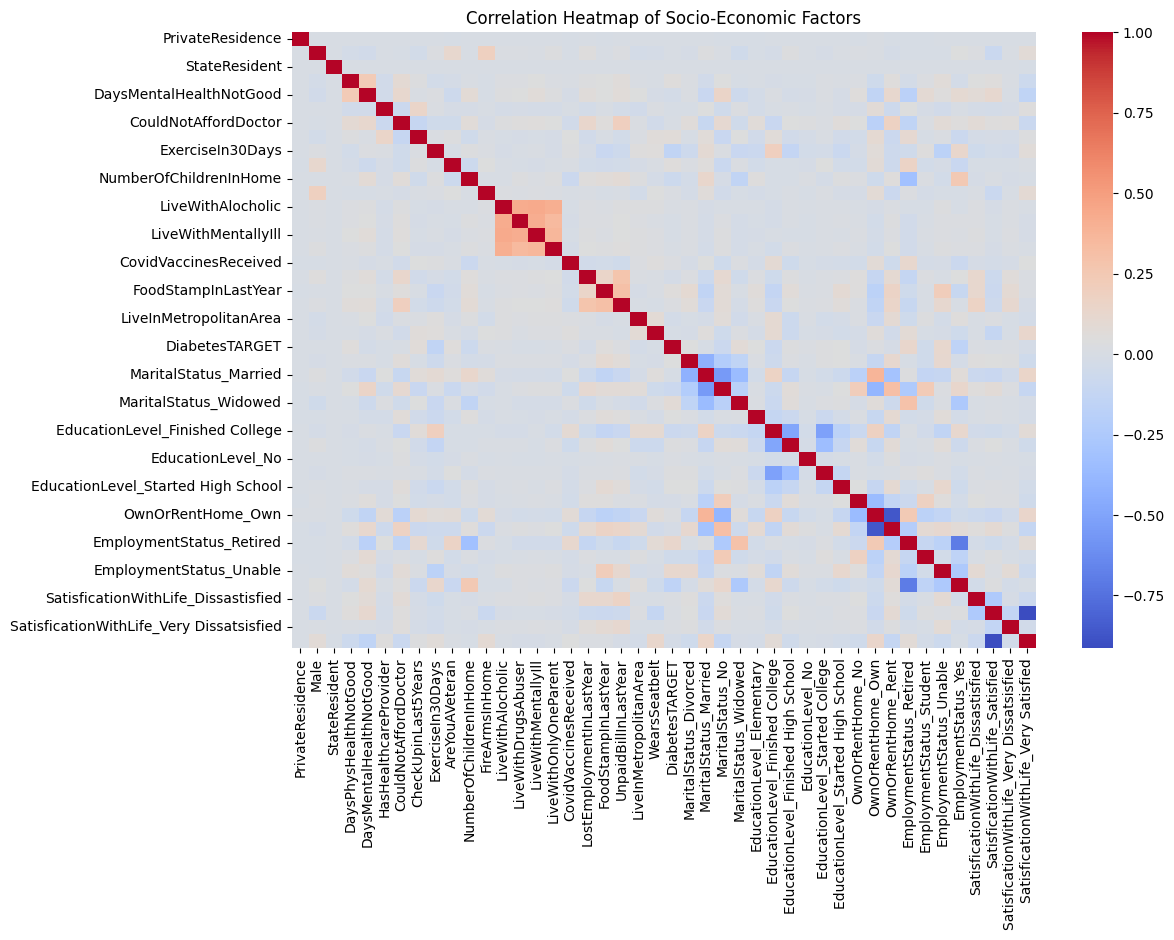

In [5]:
display(Image(filename='image.png'))



###  Dimensionality Reduction and Clustering
Principal Component Analysis (PCA) was applied to reduce the feature space to two di-
mensions for visualization, preserving maximum variance. K-Means clustering (n_clusters=3,
random_state=42) segmented the population into socio-economic groups, with cluster centroids analyzed to interpret demographic patterns. Silhouette scores evaluated clustering quality, ensuring meaningful segmentation. A scatter plot visualized the PCA-reduced data with cluster labels. These methods, implemented in Scikit-learn, supported hypothesis generation about socio-economic inﬂuences on diabetes.



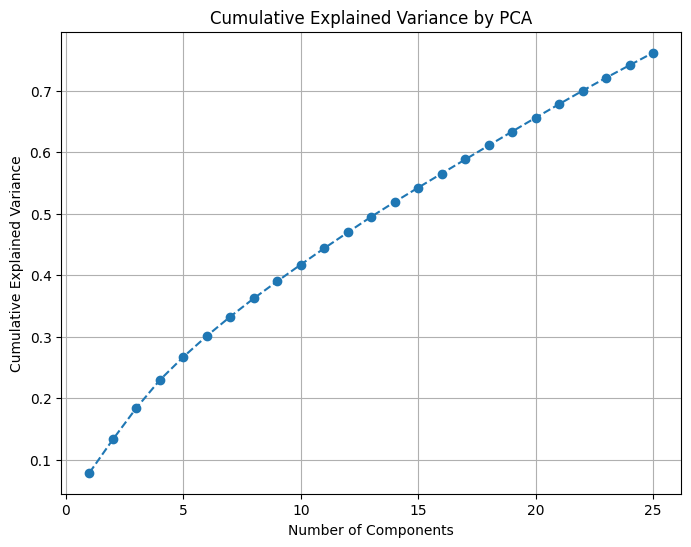

In [4]:
display(Image(filename='image-1.png'))


* Model Building
Four classiﬁcation models were developed, each integrated into a pipeline with StandardScaler for feature scaling and SMOTE for class balancing:
    * Logistic Regression: Conﬁgured with max_iter=500 and L2 regularization to ensure convergence and prevent overﬁtting, serving as a linear baseline.
    * Random Forest Classiﬁer: Set with n_estimators=100, max_depth=None, and random_state=42, leveraging ensemble learning to capture non-linear relationships. Feature importance was visualized in a bar plot.
    * XGBoost: Conﬁgured with use_label_encoder=False, eval_metric=’mlogloss’, random_state=42, device=’cuda’, and n_jobs=-1, optimized for GPU acceleration and parallel processing.
    * Neural Networks: Two architectures were tested using TensorFlow/Keras:
        * Dense Neural Network:
            * Input layer matching feature count.
            * First hidden layer: 128 neurons, ReLU activation, He normal initialization.
            * Dropout layer: 0.3 rate.
            * Second hidden layer: 64 neurons, ReLU activation, He normal initialization.
            * Dropout layer: 0.3 rate.
            * Output layer: 1 neuron, sigmoid activation.
        Compiled with Adam optimizer (learning rate 5e-4), binary cross-entropy loss, and trained for 10 epochs with batch size 64, using early stopping and learning rate reduction.
        * Less Dense Neural Network:
            * Input layer matching feature count.
            * First hidden layer: 10 neurons, ReLU activation, He normal initialization.
            * Batch normalization layer.
            * Dropout layer: 0.3 rate.
            * Second hidden layer: 10 neurons, ReLU activation, He normal initialization.
            * Batch normalization layer.
            * Dropout layer: 0.3 rate.
            * Output layer: 1 neuron, sigmoid activation.
        Compiled with Adam optimizer (learning rate 5e-4), focal loss (gamma=2.0, alpha=0.75) to address class imbalance, and custom F1-score metric. Trained for up to 100 epochs with batch size 64, using class weights (0:1.0, 1:2.0), early stopping (patience=15), and learning rate reduction (patience=5).

* Model Evaluation
Models were evaluated using 5-fold cross-validation, reporting accuracy, precision, recall, F1-score, and ROC-AUC. Confusion matrices visualized classiﬁcation errors. For Neural Networks, threshold optimization (0.3 to 0.8) was performed to maximize macro F1- score, balancing performance across classes. A ROC curve compared Neural Network performance. The test set sizes were 86,665 for traditional models and 111,086 for Neural Networks, noted for comparison.


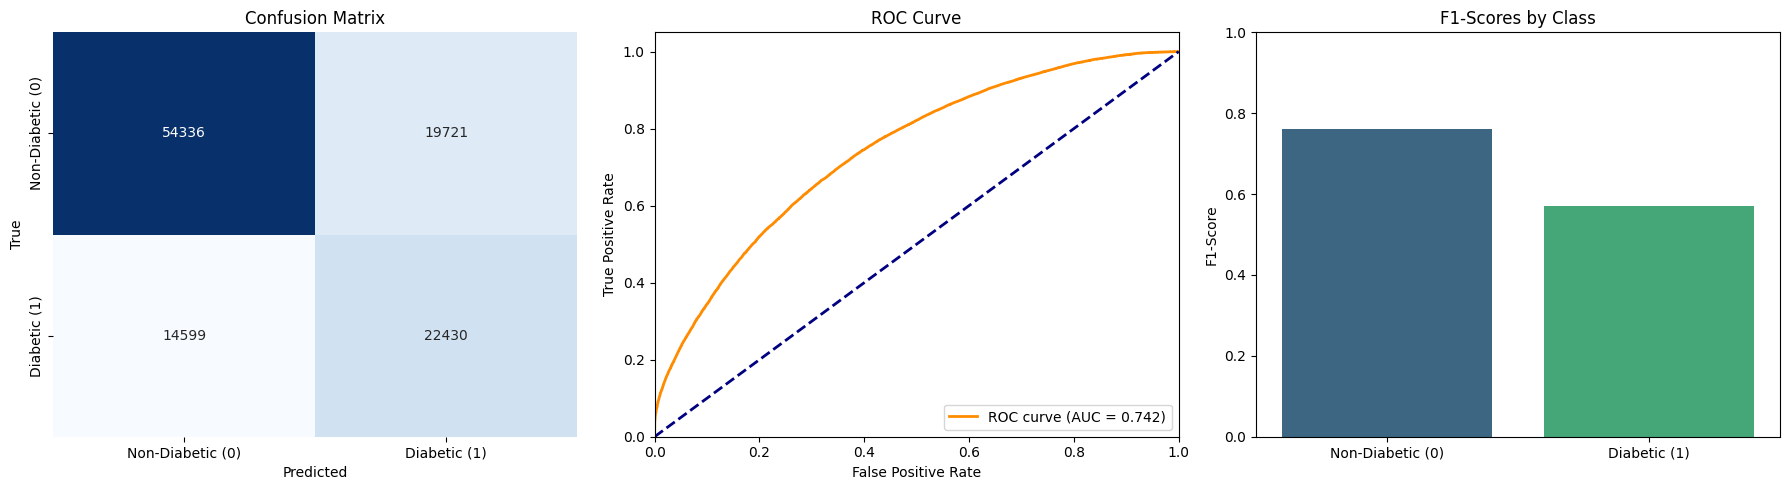

In [3]:
from IPython.display import Image, display

display(Image(filename='image-2.png'))

# Results

Model performance is detailed below, emphasizing class imbalance handling and comprehensive metrics.

###  Traditional Models
Classiﬁcation reports for traditional models are shown:

Table 1: Classification Report for Logistic Regression


| Class            | Precision | Recall | F1-Score | Support |
|-------------------|-----------|--------|----------|---------|
| Non-Diabetic (0.0) | 0.92      | 0.63   | 0.75     | 74,118  |
| Diabetic (1.0)    | 0.23      | 0.66   | 0.34     | 12,547  |
| **Accuracy**      |           |        | **0.64** | 86,665  |
| Macro Avg         | 0.57      | 0.64   | 0.55     | 86,665  |
| Weighted Avg      | 0.82      | 0.64   | 0.69     | 86,665  |


Table 2: Classification Report for Random Forest


| Class            | Precision | Recall | F1-Score | Support |
|-------------------|-----------|--------|----------|---------|
| Non-Diabetic (0.0) | 0.87      | 0.87   | 0.87     | 74,118  |
| Diabetic (1.0)    | 0.23      | 0.23   | 0.23     | 12,547  |
| **Accuracy**      |           |        | **0.78** | 86,665  |
| Macro Avg         | 0.55      | 0.55   | 0.55     | 86,665  |
| Weighted Avg      | 0.78      | 0.78   | 0.78     | 86,665  |


Table 3: Classification Report for XGBoost


| Class            | Precision | Recall | F1-Score | Support |
|-------------------|-----------|--------|----------|---------|
| Non-Diabetic (0.0) | 0.87      | 0.92   | 0.89     | 74,118  |
| Diabetic (1.0)    | 0.25      | 0.17   | 0.20     | 12,547  |
| **Accuracy**      |           |        | **0.81** | 86,665  |
| Macro Avg         | 0.56      | 0.54   | 0.55     | 86,665  |
| Weighted Avg      | 0.78      | 0.81   | 0.79     | 86,665  |


Logistic Regression achieved a higher F1-score (0.34) for the diabetic class compared to Random Forest (0.23) and XGBoost (0.20), despite lower accuracy (64%). XGBoost’s high accuracy (81%) favored the majority class, reﬂecting challenges with class imbalance.

###  Neural Networks
The Dense and Less Dense Neural Networks were evaluated on a test set of 111,086 samples:
The Dense Neural Network outperformed the Less Dense variant in accuracy (0.69 vs. 0.66), ROC-AUC (0.744 vs. 0.714), and macro F1-score (0.67 vs. 0.64), with a slightly higher diabetic F1-score (0.57 vs. 0.56). The Less Dense model, using focal loss and a controlled SMOTE strategy, improved recall for the diabetic class (0.64 vs. 0.61) but at the cost of lower precision (0.49 vs. 0.54).

###  Impact of Class Imbalance
SMOTE signiﬁcantly improved minority class performance, particularly for Neural Net- works. The Dense Neural Network beneﬁted from full SMOTE balancing, while the Less Dense models controlled SMOTE and focal loss enhanced diabetic class recall. However, low recall in Random Forest (0.23) and XGBoost (0.17) indicates persistent imbalance challenges, suggesting exploration of techniques like ADASYN or higher class weights.

###  Feature Importance and Clustering Insights
Random Forest feature importance identiﬁed education and employment as top predic- tors, visualized in a bar plot Correlation heatmaps revealed variable relationships, and PCA with K-Means clustering segmented the data into three socio-economic clusters, visualized in a scatter plot.


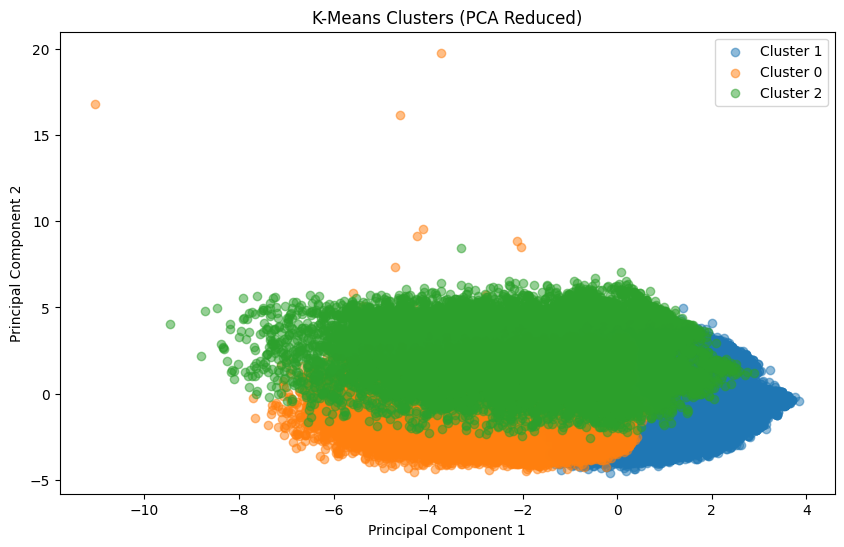

In [ ]:

display(Image(filename='image-3.png'))





###  Conclusion
The Dense Neural Network achieved the best overall performance (accuracy 0.69, ROC- AUC 0.744, diabetic F1-score 0.57), leveraging full SMOTE balancing.

Table 4: Classification Report for Dense Neural Network


| Class            | Precision | Recall | F1-Score | Support |
|-------------------|-----------|--------|----------|---------|
| Non-Diabetic (0.0) | 0.79      | 0.74   | 0.76     | 74,057  |
| Diabetic (1.0)    | 0.54      | 0.61   | 0.57     | 37,029  |
| **Accuracy**      |           |        | **0.69** | 111,086 |
| ROC-AUC           | 0.74      |        |          |         |
| Macro Avg         | 0.66      | 0.67   | 0.67     | 111,086 |
| Weighted Avg      | 0.71      | 0.69   | 0.70     | 111,086 |

Table 5: Classification Report for Less Dense Neural Network


| Class            | Precision | Recall | F1-Score | Support |
|-------------------|-----------|--------|----------|---------|
| Non-Diabetic (0.0) | 0.79      | 0.67   | 0.72     | 74,057  |
| Diabetic (1.0)    | 0.49      | 0.64   | 0.56     | 37,029  |
| **Accuracy**      |           |        | **0.66** | 111,086 |
| ROC-AUC           | 0.71      |        |          |         |
| Macro Avg         | 0.64      | 0.66   | 0.64     | 111,086 |
| Weighted Avg      | 0.69      | 0.66   | 0.67     | 111,086 |

The Less Dense Neural Network, with focal loss and controlled SMOTE, improved diabetic recall but sac- riﬁced precision and overall metrics. Logistic Regression outperformed Random Forest and XGBoost for the diabetic class (F1-score 0.34), despite lower accuracy. Class imbal- ance mitigation via SMOTE and focal loss was critical, but further optimization (e.g., en- semble methods, advanced resampling) could enhance minority class performance. These results underscore socio-economic factors role in diabetes prediction, informing public health interventions.







# Discussion

We set out to build a model that could predict type II diabetes using only socioeconomic factors—and while we didn’t achieve perfect accuracy, we made solid progress. Our models, especially the Dense Neural Network, showed that factors like income, education, and healthcare access do carry predictive power, even without medical data. That was one of our key goals: to see if social conditions alone could help flag at-risk
 individuals early. For our stakeholders—public health agencies and insurance providers—this matters because it means they can better target interventions and resources using just population-level data. That said, we know there’s more work to be done. Predicting diabetes without clinical data has its limits. To truly meet stakeholder needs, future models should include health history over time, and perhaps
even track changes in community-level resources to understand broader impacts. So, while we didn’t solve everything, we’ve taken a meaningful step toward identifying risk based on where people live and how they live, not just their lab results.


# Limitations


Our biggest limitation was the stationary nature of our data. We had to adapt our approach to fit cross-sectional data. At the start, our goal was to use health conditions as an indicator of diabetes; however, we were unable to discern which condition developed first. Previous research in the field of diabetes has shown that multiple health conditions and lifestyle choices, including obesity and smoking, contribute to the development of diabetes. We were restricted to using diabetes as a proxy for other health conditions which affects the results, no matter what mitigating factors were used. Our final approach, determining how well certain socioeconomic indicators predicted a diabetic outcome, was still limited by the type of data provided by the BRFSS. The inclusion of a person’s health history, particularly, the dates they developed any health conditions, would have allowed us to increase the accuracy of our predictions. It would allow for a more efficient allocation of funds within the given communities and health care systems. In turn, this would help with increasing preventative care for not only diabetes but other preventable diseases as well.  Given our specific goals of identifying at risk communities and reducing the load on the health care system, being able to accurately, and consistently, predict areas at higher risk of developing diabetes, and using that as an indicator of other health conditions, will give more targeted areas for funding, decrease the development of preventable diseases, and decrease the strain on the health system while also decreasing the need for funding in the long term.

# Future Work

In the future, as stated in the limitations section, extending our model to include a person’s health history over time would increase its accuracy. Additionally, creating new ways to decrease the conditions where diabetes, and other diseases, are prevalent would only serve to boost the efficacy of the funding. This could be done using machine learning with historic funding data and health data in order to reveal overlapping factors that contribute to the issue and would allow us to determine what changes (increased access to healthcare, increased income, increased health education) results in the largest decrease in disease prevalence. Combining social, health, and economic initiatives would allow for increased success.
